In [ ]:
Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
toyota = pd.read_csv("ToyotaCorolla.csv", encoding = "ISO-8859-1")

In [4]:
toyota.head()

,ï»¿Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,Â TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# EDA and Data Visualization

In [5]:
Corolla = toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [6]:
Corolla

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
Corolla.shape

(1436, 9)

In [8]:
Corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [9]:
Corolla.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [10]:
Corolla1 = Corolla.copy()

In [11]:
#rename the Solar column
Corolla = Corolla.rename({'Age_08_04': 'Age','Quarterly_Tax':'QuarterlyTax'}, axis=1)

In [12]:
Corolla.head(5)

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## Duplicated Rows

In [13]:
Corolla[Corolla.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [14]:
#To check which of the rows are duplicated
Corolla[Corolla['KM']== 13253]

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
112,24950,8,13253,116,2000,5,5,234,1320
113,24950,8,13253,116,2000,5,5,234,1320


In [15]:
Corolla[Corolla.index.isin([112,113,114,115])]

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
112,24950,8,13253,116,2000,5,5,234,1320
113,24950,8,13253,116,2000,5,5,234,1320
114,22950,7,10000,116,2000,5,5,234,1270
115,24990,8,6000,90,2000,5,5,234,1280


In [16]:
Corolla=Corolla.drop_duplicates().reset_index(drop=True)  #The last duplicated row 113 will be removed

In [17]:
print(Corolla[Corolla['KM']== 13253])
print(Corolla.shape)

     Price  Age     KM   HP    cc  Doors  Gears  QuarterlyTax  Weight
112  24950    8  13253  116  2000      5      5           234    1320
(1435, 9)


In [18]:
Corolla[Corolla.index.isin([112,113,114,115])]

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
112,24950,8,13253,116,2000,5,5,234,1320
113,22950,7,10000,116,2000,5,5,234,1270
114,24990,8,6000,90,2000,5,5,234,1280
115,21950,8,10841,90,2000,5,5,234,1270


# Correlation Matrix

In [19]:
Corolla.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QuarterlyTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [ ]:
Age~Km=0.504   Weight~QuartelyTax=0.622 (All These Indep Variables are moderately Positve corelated)
# ANY Corelation VALUE for Independent variables which is close to +1 and -1  is a disaster because they are "Independent Variable"

## Scatterplot between variables

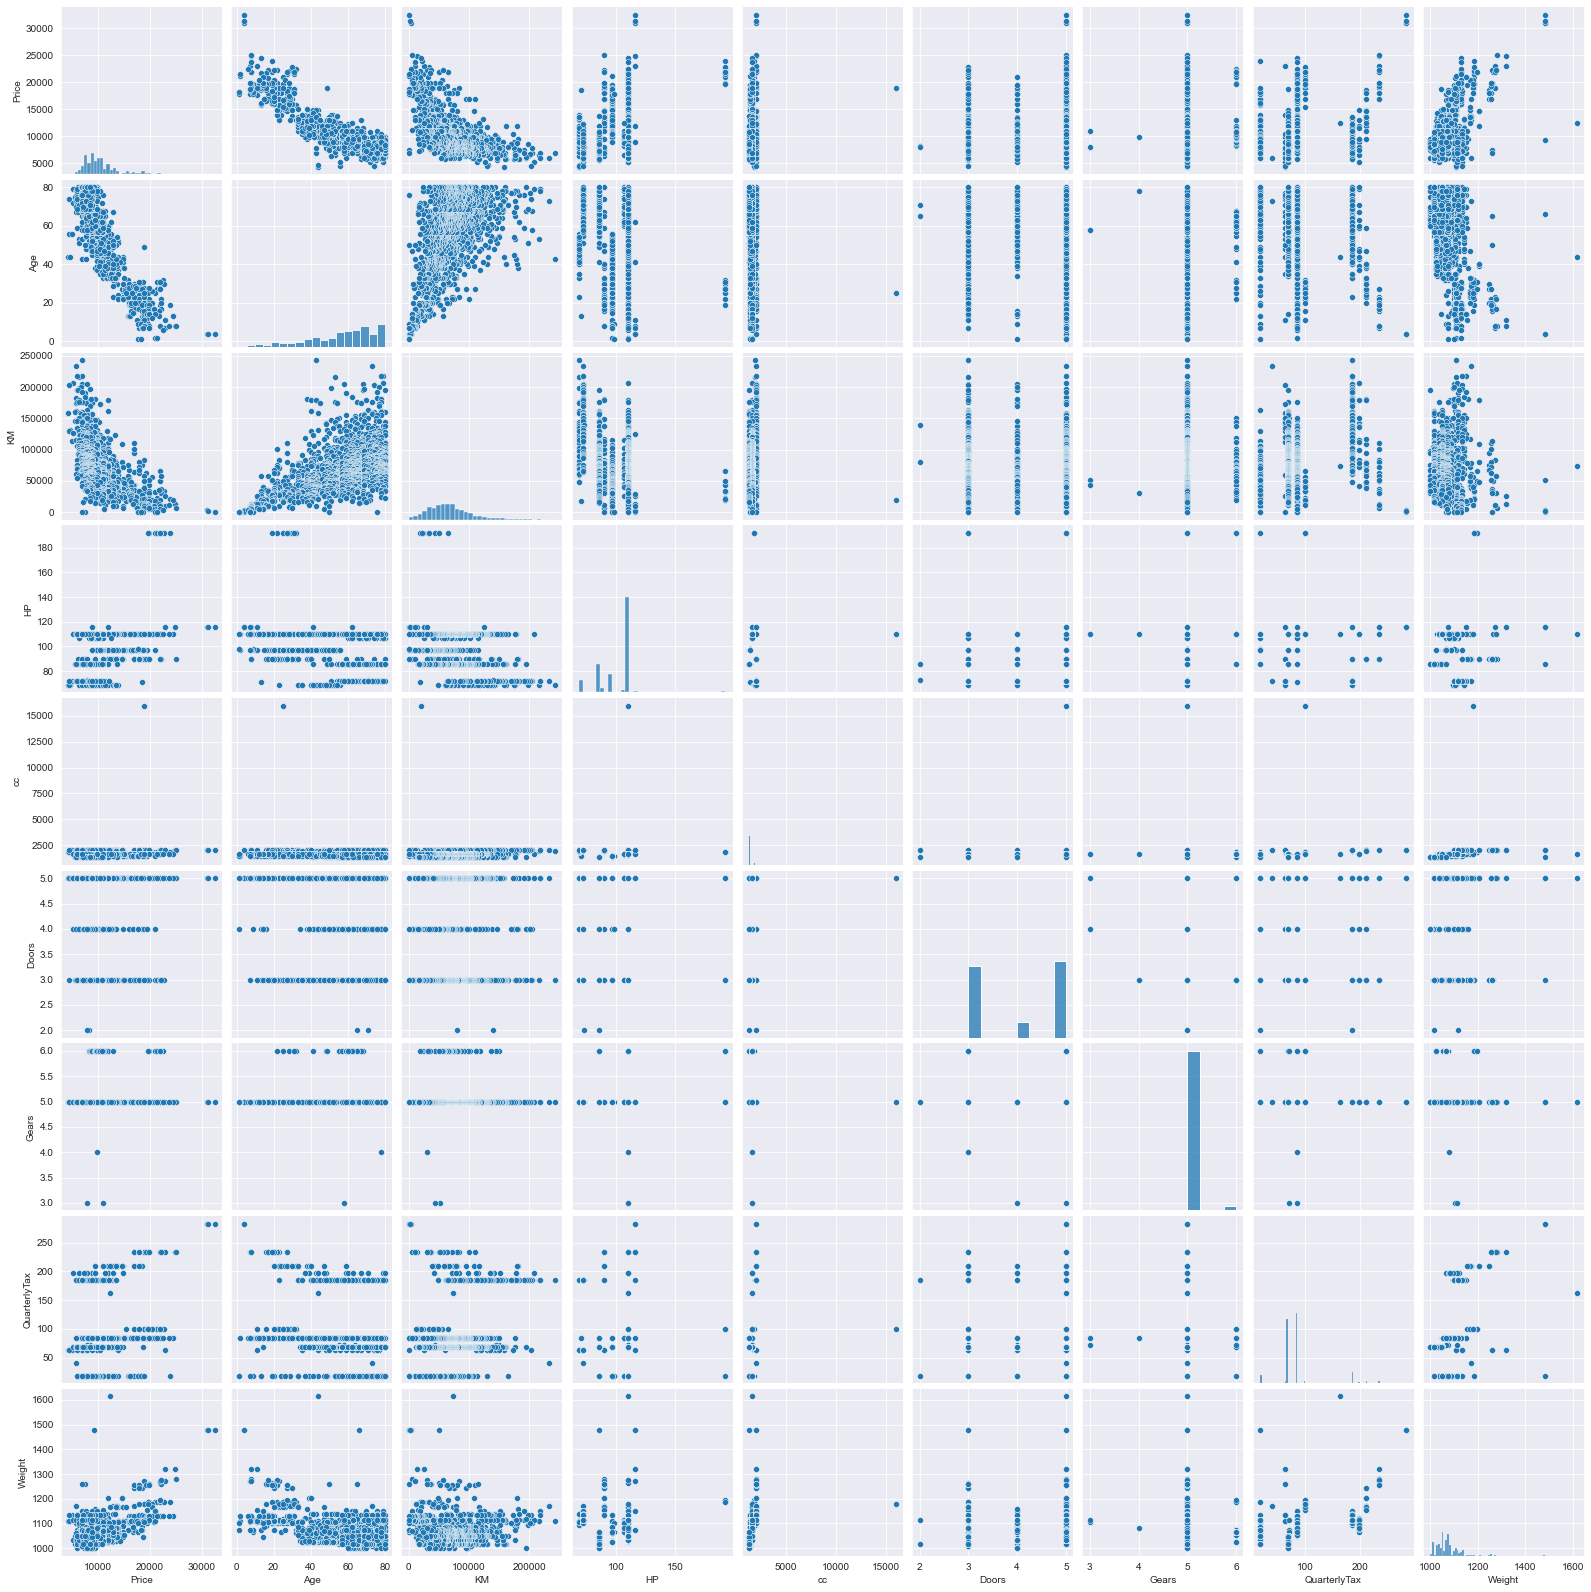

In [20]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Corolla)

# Preparing a model

In [21]:
# First We will Do the Regression
#Build model  #Using OLS method and Price wrt all the Independent Variables
# import statsmodels.formula.api as smf

model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight',data=Corolla).fit()

In [22]:
# Pridected Values for Price  Y^
model.fittedvalues

0       16791.958871
1       16253.800414
2       16779.635210
3       16405.789389
4       16200.217277
            ...     
1430     8794.255037
1431     8292.577342
1432     8455.434402
1433     8579.222041
1434    10396.087526
Length: 1435, dtype: float64

In [87]:
model.resid     #errors e = Y(Price)  -  Y^(Pridicted Price)

0      -3291.958871
1      -2503.800414
2      -2829.635210
3      -1455.789389
4      -2450.217277
           ...     
1430   -1294.255037
1431    2552.422658
1432      44.565598
1433   -1329.222041
1434   -3446.087526
Length: 1435, dtype: float64

# Model Testing

In [23]:
# Beta Coefficients
model.params

# Regression eqn : Price(Y) = ßo + ß1*Age + ß2*KM + ß3*HP + ß4*cc + ß5*Doors + ...
# ßo= -5472.540  ß1= -121.713 , ß2=-0/020, ß3, ß4 ,ß5

Intercept      -5472.540368
Age             -121.713891
KM                -0.020737
HP                31.584612
cc                -0.118558
Doors             -0.920189
Gears            597.715894
QuarterlyTax       3.858805
Weight            16.855470
dtype: float64

In [ ]:
# Beta Coefficient Interpretation
### Given a unit increase in HP variable, The Price variable increases by 31.584 since it is a positive beta coefficient for HP variable.
### Given a unit increase in Age variable, The Price variable decreases by 121.71 since it is a Negative beta coefficient for Age variable.

In [24]:
# Finding tvalues/test stats  and pvalues
#Why t stats? ->Hypothesis: Ho :if pvalue >> 0.05: Not Significant-> says they are Not Contributing To each other So we try to remove one variable at a time and check the Significance again and conclude
#t and p-Values
# Check for pValues >> 0.05
model.tvalues , np.round(model.pvalues,5)  

# For cc and Doors >> 0.05 (both Should be dropped individually because they are Not Statistically significant)

(Intercept       -3.875273
 Age            -46.551876
 KM             -16.552424
 HP              11.209719
 cc              -1.316436
 Doors           -0.023012
 Gears            3.034563
 QuarterlyTax     2.944198
 Weight          15.760663
 dtype: float64,
 Intercept       0.00011
 Age             0.00000
 KM              0.00000
 HP              0.00000
 cc              0.18824
 Doors           0.98164
 Gears           0.00245
 QuarterlyTax    0.00329
 Weight          0.00000
 dtype: float64)

In [ ]:
# So the new Regression Eqn after dropping cc and Doors is : Price(Y) = ßo + ß1*Age + ß2*KM + ß3*HP + ß4*Gears ß5*QuarterlyTax + ..
# But Still these two Variables(cc & Doors) are Somehow Contribute/impact the Price

In [25]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

In [ ]:
# Investigate why these two cc and Doors are insignificant in Regression equation
# Building SLR and MLR models for insignificant variables 'cc' and 'Doors'
# Also find their tvalues and pvalues

# Simple Linear Regression Models and MLR

# SLR

In [26]:
slr_cc = smf.ols('Price~cc',data = Corolla).fit()  
#t and p-Values
print(slr_cc.tvalues, '\n', slr_cc.pvalues) 

Intercept    24.879592
cc            4.745039
dtype: float64 
 Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64


#Now here we can see the P-Values are very very << Low 0.05 
## So, CC is Significant
#So the Ho is rejected (Ho said that they have No Contribution)
#Therefore said that they Have Contribution (cc is very much imp to predict price) which is True and we accept Ha

In [27]:
slr_doors = smf.ols('Price~Doors',data = Corolla).fit() 
#t and p-Values
print(slr_doors.tvalues, '\n', slr_doors.pvalues)  # Doors has significant pvalue

Intercept    19.421546
Doors         7.070520
dtype: float64 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


#Same Here, pValue of Doors (0.000..8 << 0.05) : 
# Doors is Significant

In [ ]:
Till here found that while Individually Im creating Model for cc and Doors the P-values are very less

In [ ]:
# Again doing the Verification: creating a mixed Model For both cc and Doors only wrt Price

# MLR

In [28]:
# MLR  Combinging both cc and Doors to check pValues and decide whethere Indep Variable we Reject Ho/Accept it (Ho said if pvalue>0.5 i.e Both are "Not Signifcant" to predict Y)

mlr_both = smf.ols('Price~cc+Doors',data=Corolla).fit()
print(mlr_both.tvalues, '\n', mlr_both.pvalues)  # CC & Doors have significant pvalue(i.e Pvalues << 0.5-> Ha accepted)

model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight',data=Corolla).fit()  #But here Doors have significant pvalue(i.e Pvalues >> 0.5 -> Not Significant
np.round(model.pvalues,5) 

Intercept    12.786341
cc            4.268006
Doors         6.752236
dtype: float64 
 Intercept    1.580945e-35
cc           2.101878e-05
Doors        2.109558e-11
dtype: float64


Intercept       0.00011
Age             0.00000
KM              0.00000
HP              0.00000
cc              0.18824
Doors           0.98164
Gears           0.00245
QuarterlyTax    0.00329
Weight          0.00000
dtype: float64

## Yes Still using the Both cc and Doors at same time in MLR Model the pvalue is less than 0.05

# Model Validation Techniques
## Two Techniques: 1. Collinearity Check & 2. Residual Analysis


## Calculating VIF(Variance Inflation Factor) :(VIF should be less than 20)
## If VIF of any variable is >= 20 that Var is involved in Multilinear Collinearity problem

### It is used to understand the correlation between the Independent variable itself.  If there is a corelation betwn the Independent variable itself there will be multiple linearity problem that occurs in the model and the results are inflated(ß coeficient will be inflated(very high coefficient)) 

In [29]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables
#Treating Age as Dependent all other are independent var

rsq_age=smf.ols('Age~KM+HP+cc+Doors+Gears+QuarterlyTax+Weight',data=Corolla).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+cc+Doors+Gears+QuarterlyTax+Weight',data=Corolla).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+cc+Doors+Gears+QuarterlyTax+Weight',data=Corolla).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('cc~Age+KM+HP+Doors+Gears+QuarterlyTax+Weight',data=Corolla).fit().rsquared
vif_cc=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+cc+Gears+QuarterlyTax+Weight',data=Corolla).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+cc+Doors+QuarterlyTax+Weight',data=Corolla).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QuarterlyTax~Age+KM+HP+cc+Doors+Gears+Weight',data=Corolla).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+QuarterlyTax',data=Corolla).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','cc','Doors','Gears','QuarterlyTax','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_cc,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QuarterlyTax,2.295375
7,Weight,2.487180


In [ ]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

## 2nd method: Residual Analysis

We use  Q-Q plot  Quantile Quantile Plots(Tests For Normality of residuals)

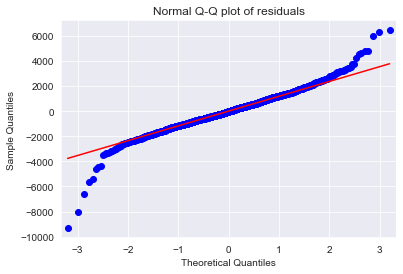

In [30]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

import statsmodels.api as sm
 
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [31]:
list(np.where(model.resid>6000))    # outlier detection from above QQ plot of residuals

# for residual > 6000 (see the Y axis range)

[array([109, 146, 522], dtype=int64)]

In [32]:
list(np.where(model.resid< -6000))

# for residual < -6000 

[array([220, 600, 959], dtype=int64)]

# Residual Plot for Homoscedasticity

In [33]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
#Normalizing the data # User defined z = (x - mu)/sigma

def standard_values(vals) : 
    return (vals-vals.mean())/vals.std()  

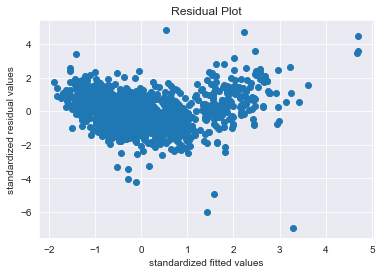

In [34]:
plt.scatter(standard_values(model.fittedvalues), #Y^ vs the residuals
            standard_values(model.resid))        #to see if the var is changing with Y^ or not
plt.title('Residual Plot')  
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

## Residual(errors) Vs Regressors(X1,X2.. or Predictors)

In [ ]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

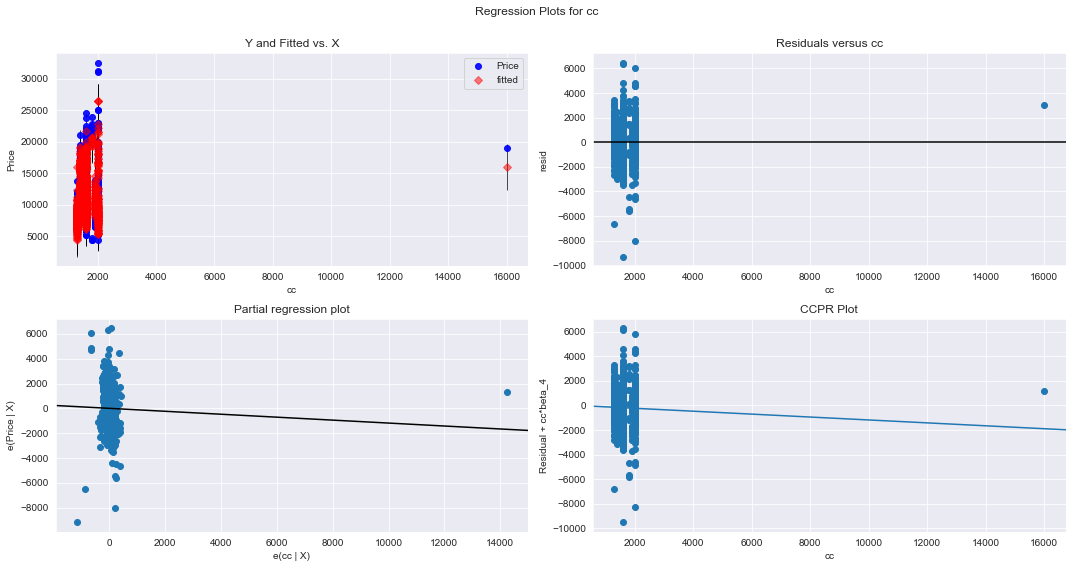

In [36]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'cc', fig=fig) 
plt.show()

# Plot1 : Price vs cc
#Here the Blue points are Price(Y-Actual Values) and Red points(Fitted means Predicted Values Y^)
#If the Blue and red point are Close to each other Model is Doing good.

# PLOT 2: Assumption2/2nd hypothesis: Feature and Error Should be independent of each other:   The Plot should be Scattered No Corelation

# Plot 3: To Show that Price(Y) is independent with cc(X) -uncorelated plot {Here, i have thrown out the effect of other features(Age, KM, HP, Doors, Gears, QuarterlyTax, Weight)}
#      ->Form Price i have thrown out other values(Age, KM, HP, Doors, Gears, QuarterlyTax, Weight) : So i understood that cc and Doors are related So its effecting the Price
#         ->In short I have also thrown out effect of cc aswell in this plot. ->So there is only Price left in Plot
#      last hypothesis: Everything have linear relnship:  Partial regression Plot?To Show->  As cc increasing Price is Not increasing(Corelation is close to 0) 
# -

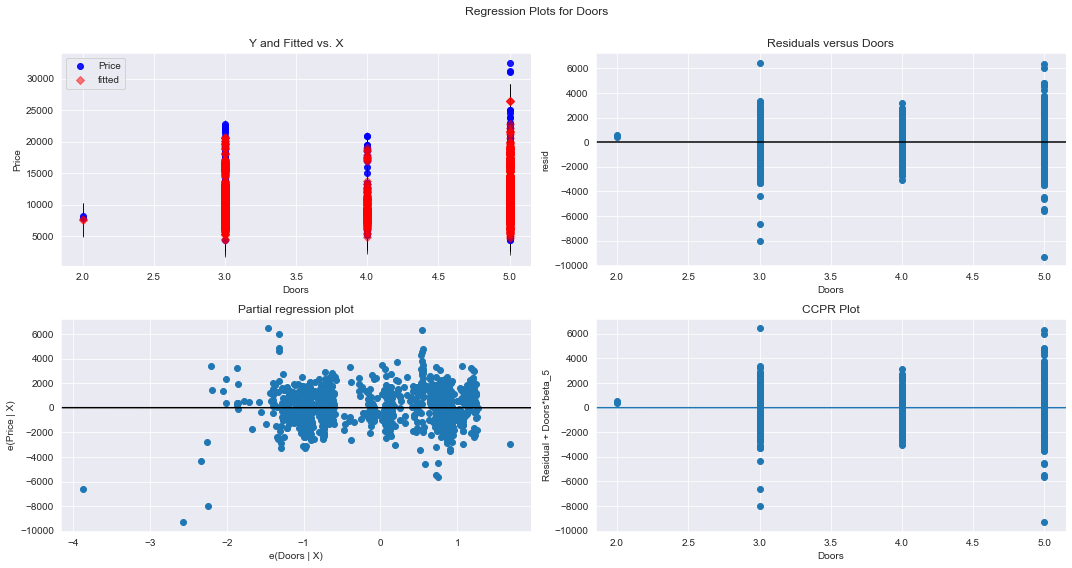

In [37]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'Doors', fig=fig) 
plt.show()

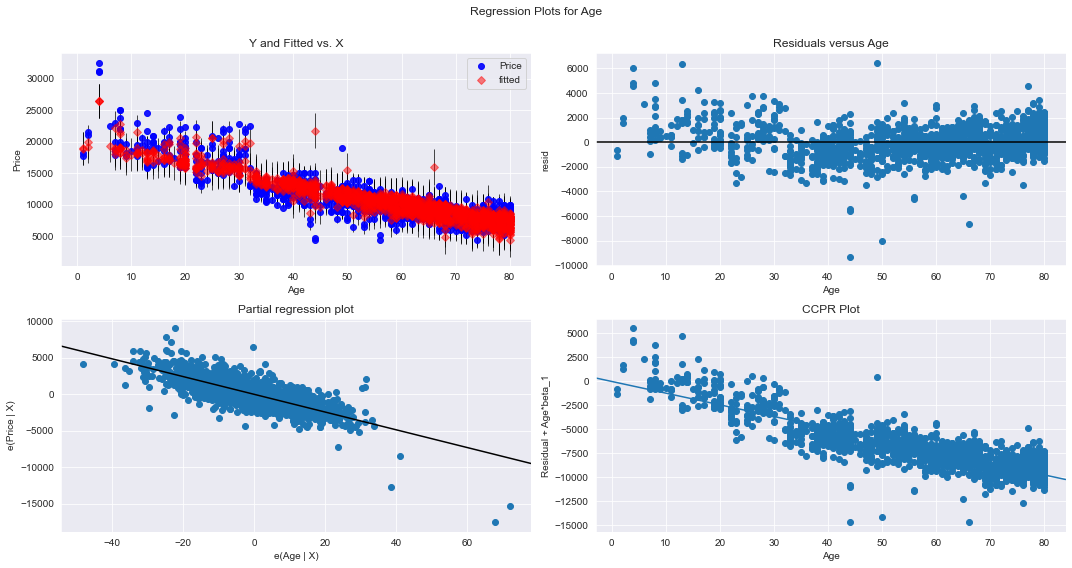

In [38]:
# wrt Age
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

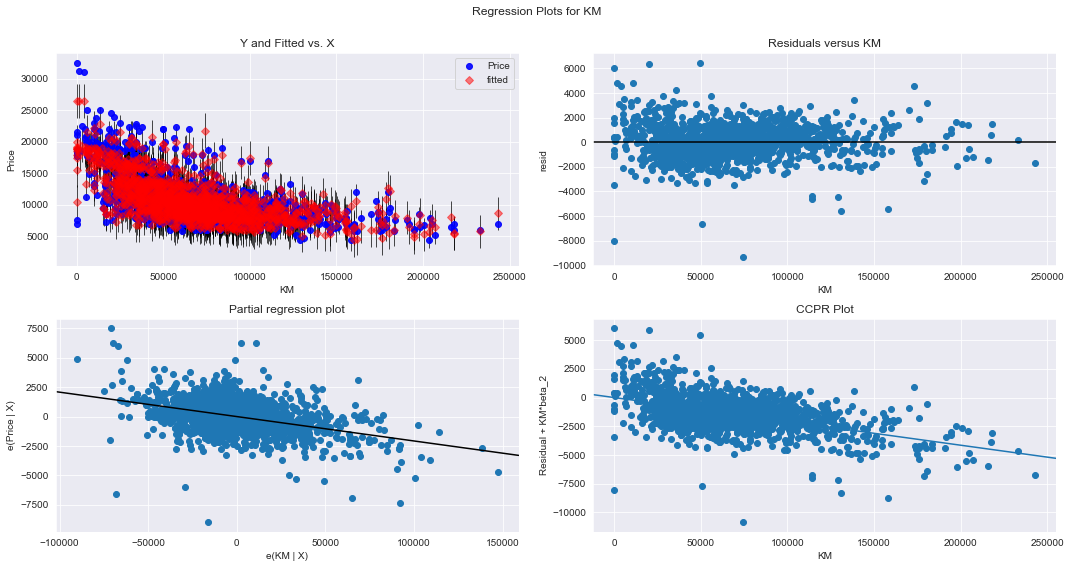

In [39]:
# wrt KM
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

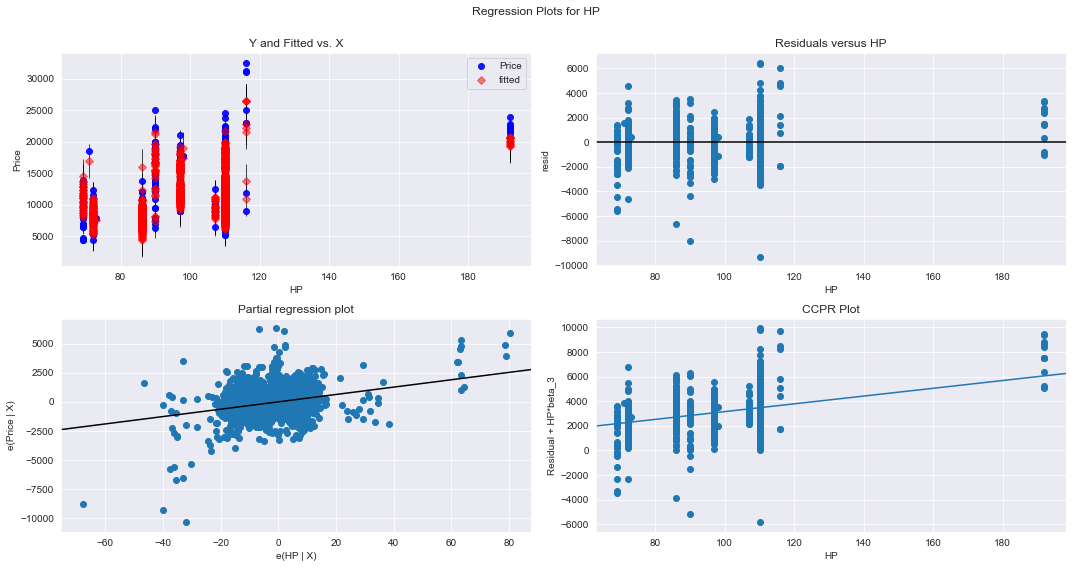

In [40]:
# wrt HP
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

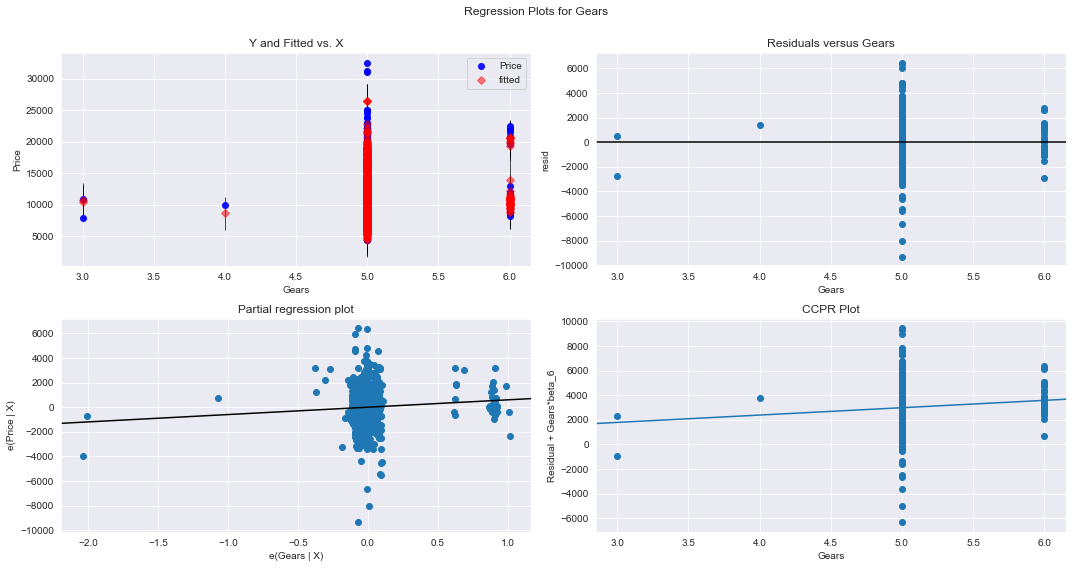

In [41]:
# wrt Gears
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

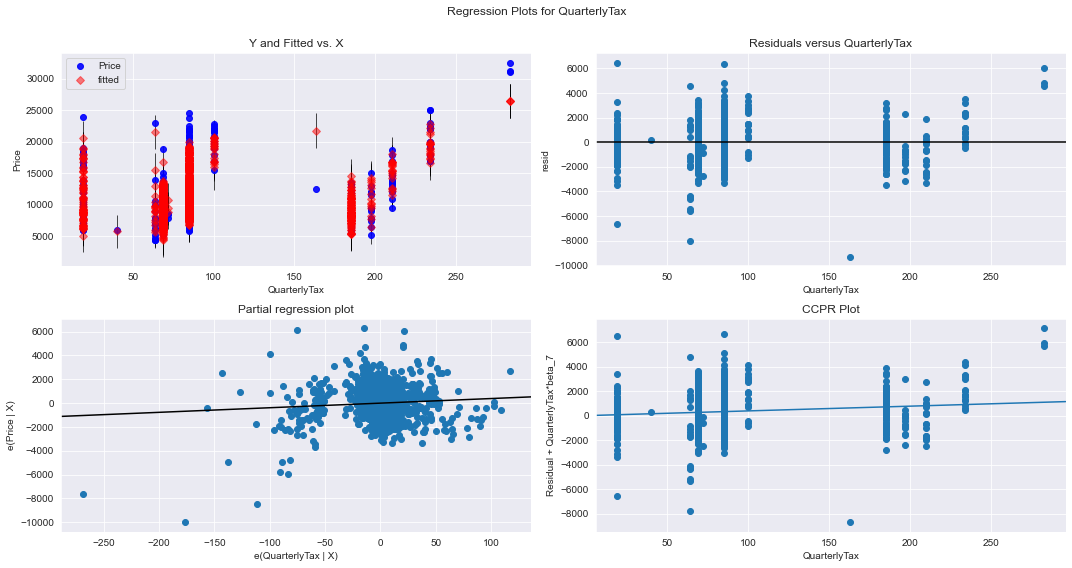

In [42]:
# wrt QT
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QuarterlyTax',fig=fig)
plt.show()

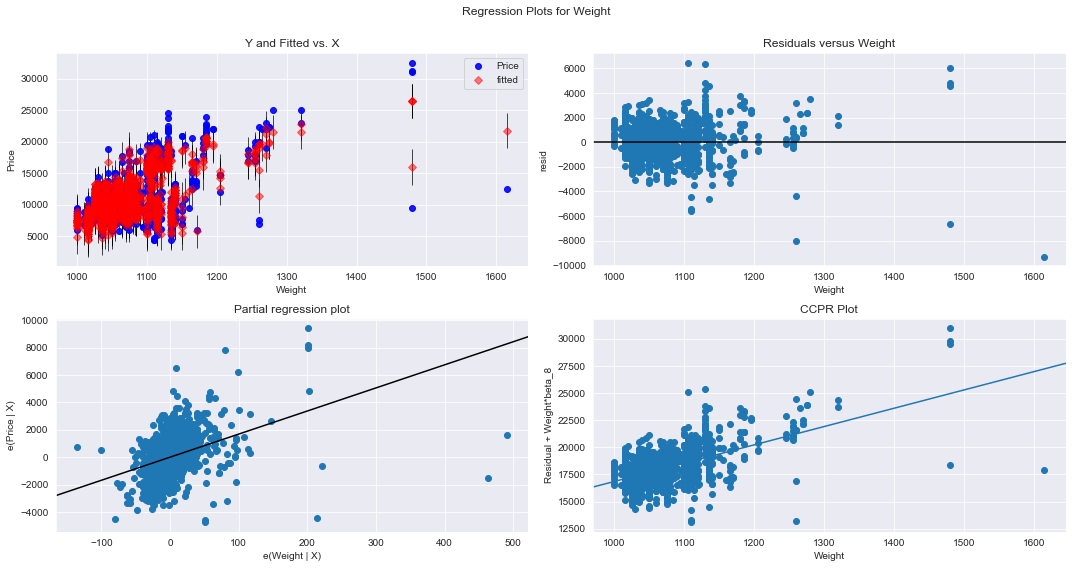

In [43]:
# wrt Weight
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

## Two Techniques : 1. Cook's Distance & 2. Leverage value
## 1st Method: Cook's Distance using Stem Plot

In [44]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance #here Cooks Distances are Storing in variable c)
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

In [45]:
Corolla.shape

(1435, 9)

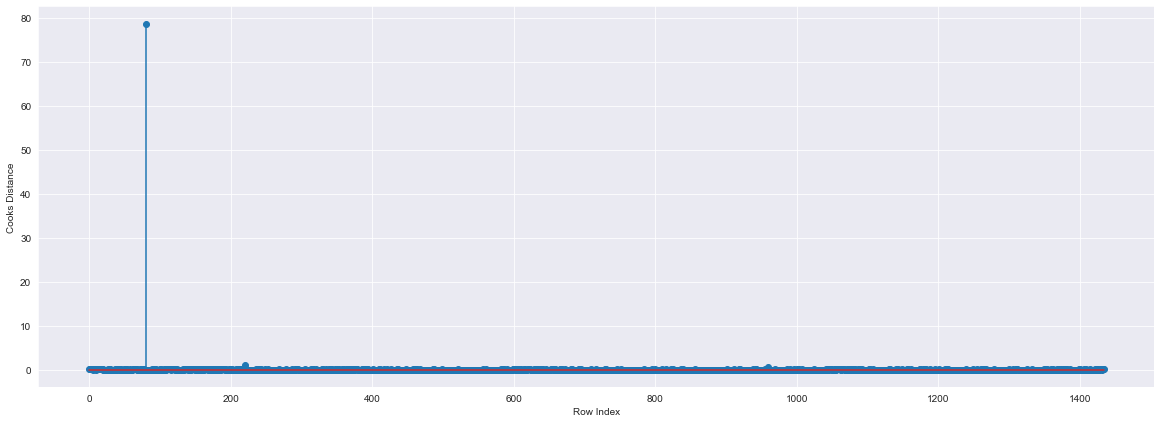

In [46]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(Corolla)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [47]:
# Index and value of influencer where C>0.5 ->iterate this process till you dont get c < 0.5
np.argmax(c) , np.max(c)

(80, 78.72950582248232)

In [ ]:
# 80th value in the data  is influential so remove it

## 2nd Method: Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers


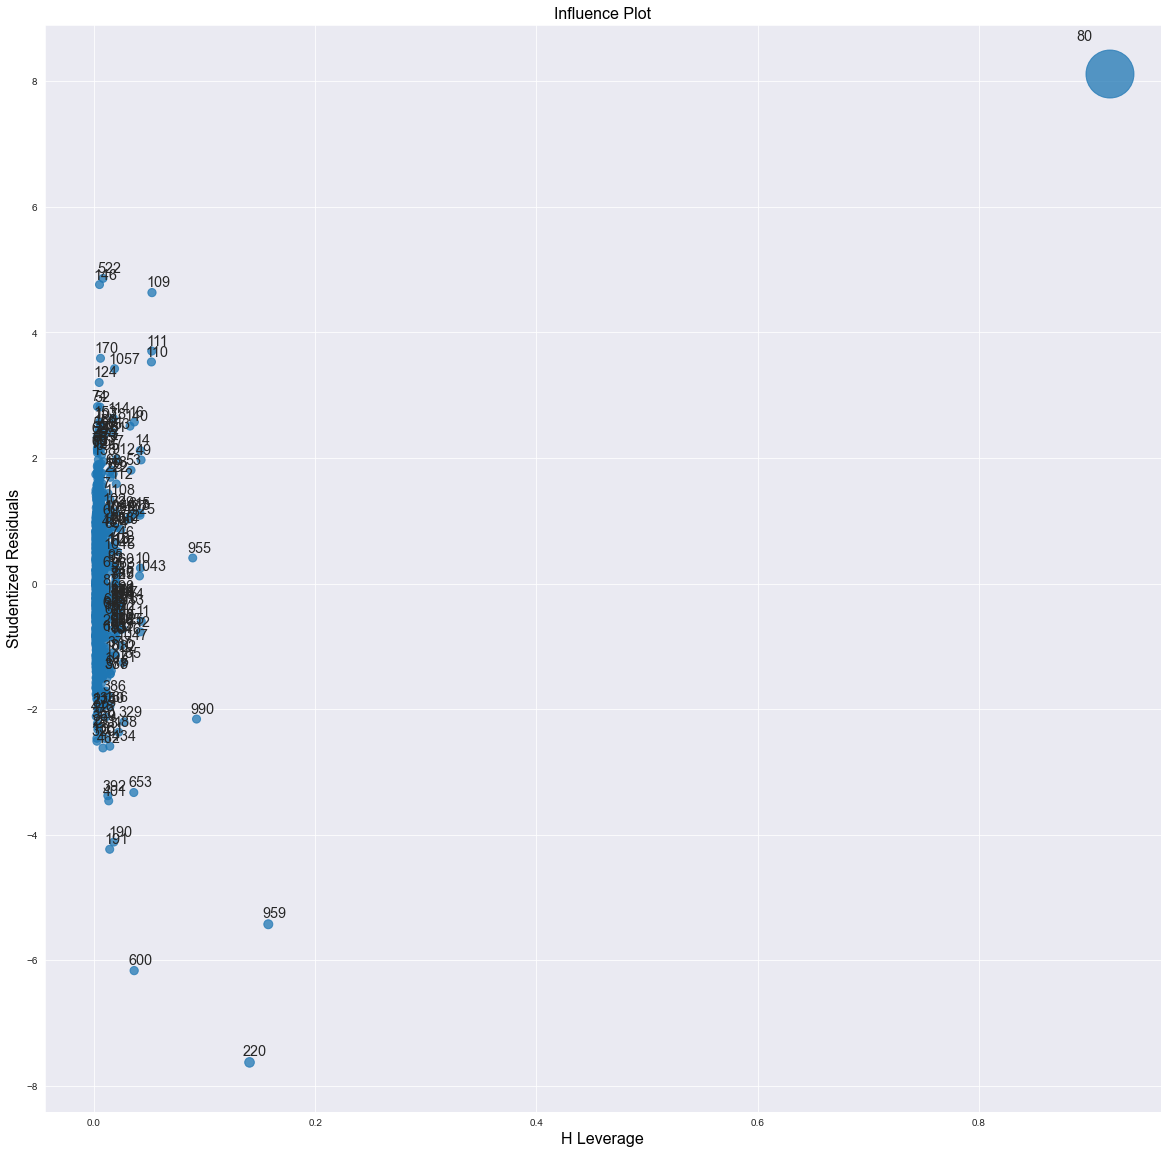

In [48]:
from statsmodels.graphics.regressionplots import influence_plot

fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

#So here also you can see point 80 is extreme point you can delete it and check

In [49]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=Corolla.shape[1]
n=Corolla.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

#0.020 -Its a threshold value, In x axis :If distance is more that threshold its Outliers

0.020905923344947737

In [50]:
# Code for Detecting rows having Outliers
Corolla[Corolla.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


#### From the above plot, it is evident that data point 80 is the influencers

# Improving the Model
(DELETING the Outlier Row = 80)

In [51]:
# Creating a copy of data so that original dataset is not affected
Corolla2 = Corolla.copy()
Corolla2

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [52]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
Corolla3 = Corolla2.drop(Corolla2.index[[80]],axis=0).reset_index(drop=True)

In [53]:
Corolla3.shape

(1434, 9)

In [54]:
Corolla3.head()

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Bulid Model

In [68]:
model1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight',data=Corolla3).fit()  #But here CC & Doors have significant pvalue(i.e Pvalues >> 0.5 -> Not Significant
np.round(model1.pvalues,5)

Intercept       0.00000
Age             0.00000
KM              0.00000
HP              0.00000
cc              0.00000
Doors           0.09009
Gears           0.00910
QuarterlyTax    0.00000
Weight          0.00000
dtype: float64

In [61]:
model_influence = model1.get_influence()
(c1, _) = model_influence.cooks_distance #here Cooks Distances are Storing in variable c)
c1

array([6.74590070e-03, 3.61405392e-03, 4.90156911e-03, ...,
       3.65590981e-06, 9.10404094e-04, 9.70018332e-03])

In [62]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=Corolla.shape[1]
n=Corolla.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

#0.020 -Its a threshold value, In x axis :If distance is more that threshold its Outliers

0.020905923344947737

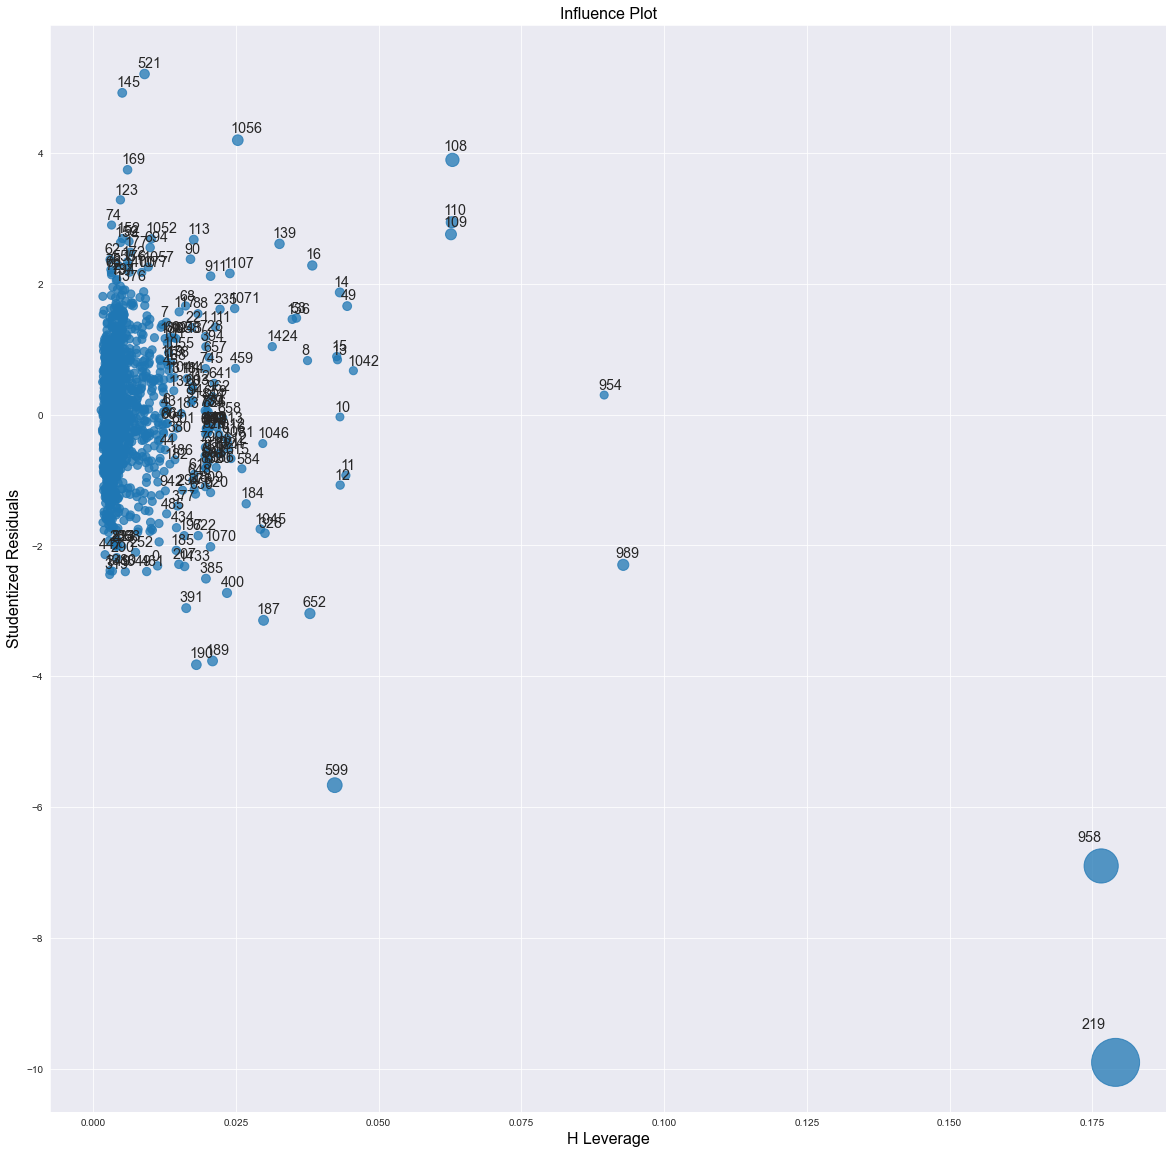

In [64]:
fig,ax= plt.subplots(figsize=(20,20))
fig= influence_plot(model1,ax = ax)

In [65]:
# Index and value of influencer where C>0.5 ->iterate this process till you dont get c < 0.5
np.argmax(c1) , np.max(c1)

(219, 2.225351365527139)

In [66]:
# Code for Detecting rows having Outliers
Corolla3[Corolla3.index.isin([219])]

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
219,12450,44,74172,110,1600,5,5,163,1615


In [67]:
Corolla3 = Corolla3.drop(Corolla3.index[[219]],axis=0).reset_index(drop=True)
Corolla3.shape

(1433, 9)

## build Model2

In [69]:
model2 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight',data=Corolla3).fit()  #But here CC & Doors have significant pvalue(i.e Pvalues >> 0.5 -> Not Significant
np.round(model2.pvalues,5)

Intercept       0.00000
Age             0.00000
KM              0.00000
HP              0.00000
cc              0.00000
Doors           0.09009
Gears           0.00910
QuarterlyTax    0.00000
Weight          0.00000
dtype: float64

In [70]:
model_influence = model2.get_influence()
(c2, _) = model_influence.cooks_distance #here Cooks Distances are Storing in variable c)
c2

array([6.93624492e-03, 3.71406676e-03, 5.00484600e-03, ...,
       3.96836748e-06, 9.68186346e-04, 1.26195368e-02])

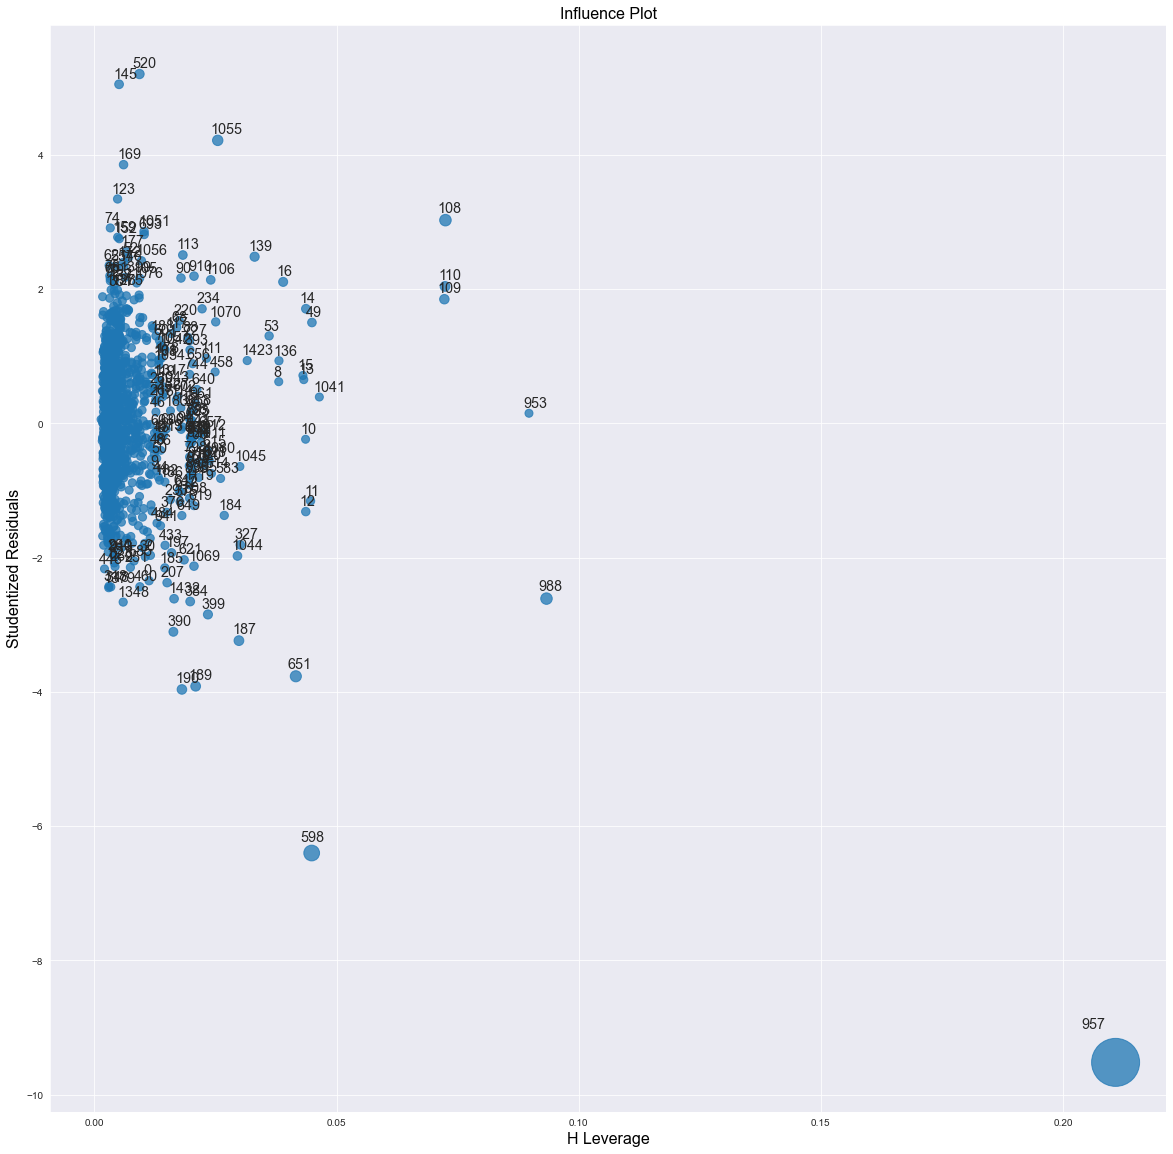

In [71]:
from statsmodels.graphics.regressionplots import influence_plot

fig,ax= plt.subplots(figsize=(20,20))
fig= influence_plot(model2,ax = ax)

In [72]:
# Index and value of influencer where C>0.5 ->iterate this process till you dont get c < 0.5
np.argmax(c2) , np.max(c2)

(957, 2.5307796232766333)

In [73]:
# Code for Detecting rows having Outliers
Corolla3[Corolla3.index.isin([957])]

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
957,9390,66,50806,86,1300,3,5,19,1480


In [74]:
Corolla4 = Corolla3.drop(Corolla3.index[[957]],axis=0).reset_index(drop=True)
Corolla4.shape

(1432, 9)

## build model3

In [75]:
model3 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight',data=Corolla4).fit()  #But here CC & Doors have significant pvalue(i.e Pvalues >> 0.5 -> Not Significant
np.round(model3.pvalues,5)

Intercept       0.00000
Age             0.00000
KM              0.00000
HP              0.00000
cc              0.00000
Doors           0.00117
Gears           0.01005
QuarterlyTax    0.00017
Weight          0.00000
dtype: float64

In [76]:
model_influence = model3.get_influence()
(c3, _) = model_influence.cooks_distance #here Cooks Distances are Storing in variable c)
c3

array([6.82389815e-03, 3.57552355e-03, 4.84841789e-03, ...,
       1.03806619e-05, 1.10039755e-03, 1.82165409e-02])

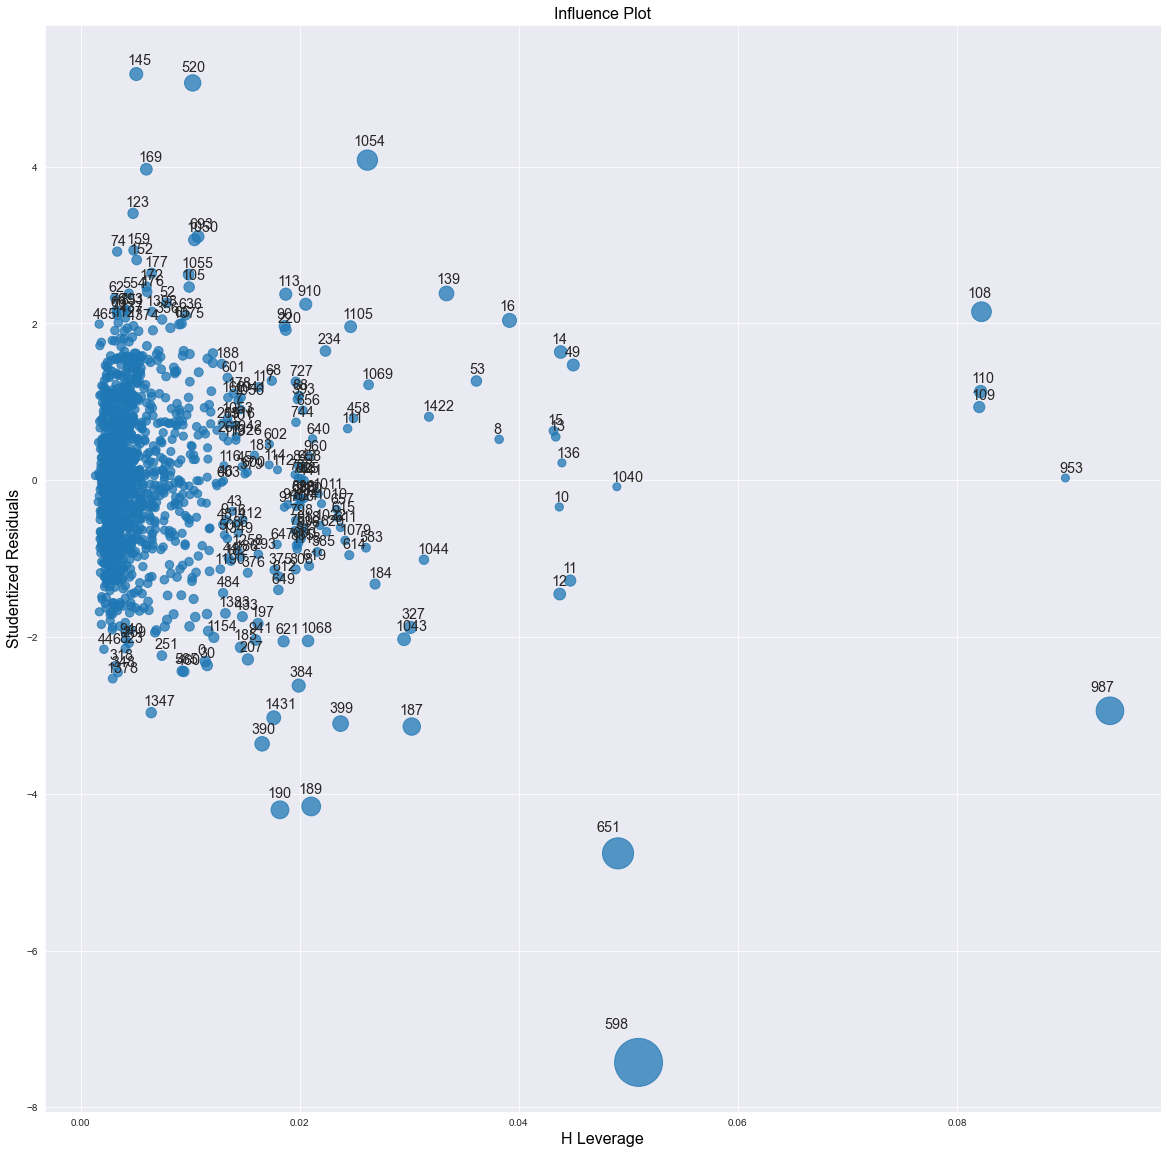

In [77]:
fig,ax= plt.subplots(figsize=(20,20))
fig= influence_plot(model3,ax = ax)

In [78]:
# Index and value of influencer where C>0.5 ->iterate this process till you dont get c < 0.5
np.argmax(c3) , np.max(c3)

#here c is < 0.5 , Stop Creating Models and Drop 598th observation


(598, 0.3168903540145268)

In [ ]:
here, we can stop since the c < 0.5
so model3 will be our final model for predictions 
lets check the rSq value

In [79]:
model3.rsquared

0.8839684606741538

In [88]:
Corolla4.shape

(1432, 9)

# Improving the Model

In [ ]:
Since , np.argmax(c) = 598 we need to remove this row and check and Finalise the Model

In [90]:
Corolla4[Corolla4.index.isin([598])]

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
598,7500,50,1,90,2000,3,5,64,1260


In [91]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
CorollaNew=Corolla4.drop(Corolla4.index[[598]],axis=0).reset_index(drop=True)
CorollaNew

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


In [92]:
CorollaNew.shape

(1431, 9)

# Build the Model using CorollaNew

In [101]:
final_model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight',data=CorollaNew).fit()  #But here CC & Doors have significant pvalue(i.e Pvalues >> 0.5 -> Not Significant
np.round(final_model.pvalues,5)

Intercept       0.00000
Age             0.00000
KM              0.00000
HP              0.00000
cc              0.00000
Doors           0.00011
Gears           0.00831
QuarterlyTax    0.00755
Weight          0.00000
dtype: float64

In [102]:
model_influence = final_model.get_influence()
(c4, _) = model_influence.cooks_distance #here Cooks Distances are Storing in variable c)
c4

array([7.18056939e-03, 3.71306271e-03, 5.13993637e-03, ...,
       1.69549130e-05, 1.19873452e-03, 2.20210592e-02])

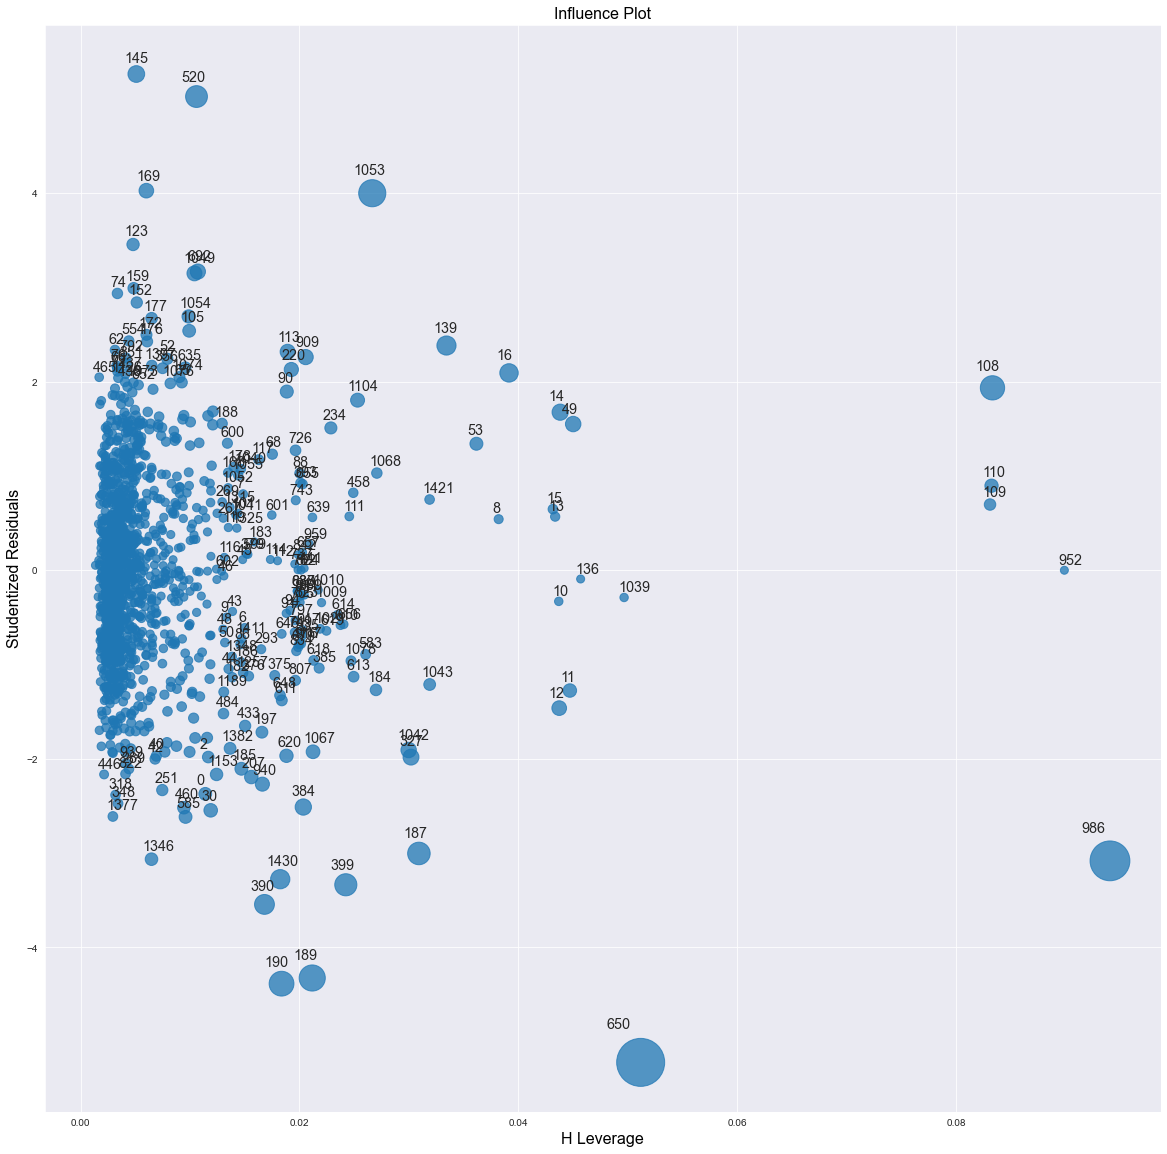

In [103]:
fig,ax= plt.subplots(figsize=(20,20))
fig= influence_plot(final_model,ax = ax)

In [104]:
final_model.rsquared

0.8882395145171204

# Model Predictions


In [97]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"cc":1300,"Doors":4,"Gears":5,"QuarterlyTax":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,12,40000,80,1300,4,5,69,1012


In [105]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14341.570181
dtype: float64

In [106]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(CorollaNew)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64

# table containing R^2 value for each prepared model

In [108]:
d2={'Prep_Models':['Model','Model1','Model2','Model3','Final_Model'],'Rsquared':[model.rsquared,model1.rsquared,model2.rsquared,model3.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.862520
1,Model1,0.876593
2,Model2,0.876593
3,Model3,0.883968
4,Final_Model,0.888240
